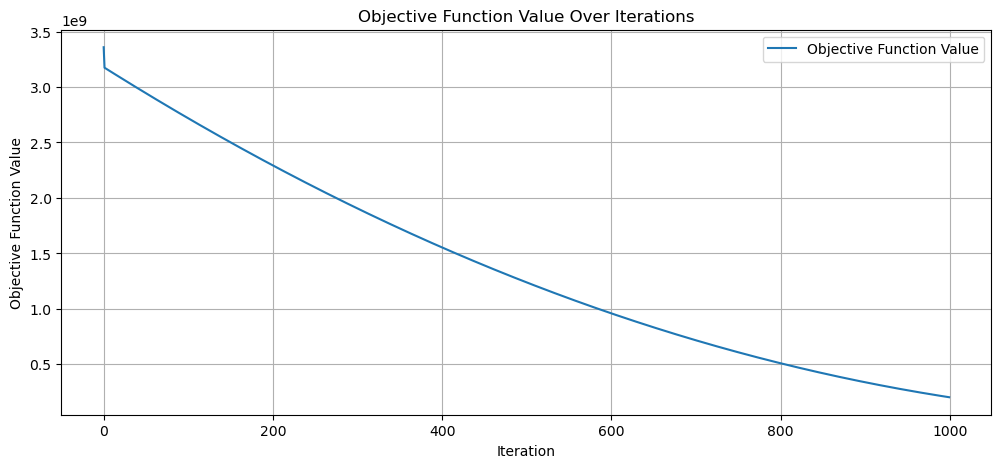

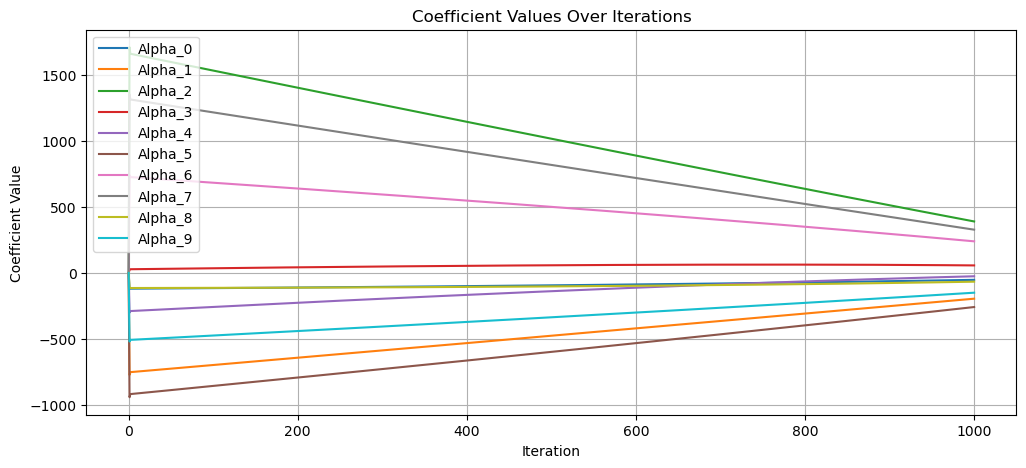

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def objective_function(X, y, beta, lambda_):
    prediction_error = y - X @ beta
    regularization_term = lambda_ * np.linalg.norm(beta, 1)
    objective_value = 0.5 * np.linalg.norm(prediction_error) ** 2 + regularization_term
    return objective_value

def gradient_of_f(X, y, beta):
    residuals = X @ beta - y
    gradient = X.T @ residuals
    return gradient

def G(vk, Lk, X, y, lambda_):
    grad_f_vk = gradient_of_f(X, y, vk)
    step_size = 1 / Lk
    vk1 = vk - step_size * grad_f_vk
    Mk = np.linalg.norm(grad_f_vk) + lambda_ * np.linalg.norm(vk1, 1)
    return vk1, Mk

def dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter):
    vk = v0
    Lk = L0
    objective_values = []
    vk_values = [vk]

    for k in range(max_iter):
        vk1, Mk = G(vk, Lk, X, y, lambda_)
        Lk1 = max(L0, Mk / gamma_d)
        vk = vk1
        Lk = Lk1
        objective_values.append(objective_function(X, y, vk, lambda_))
        vk_values.append(vk)

    return vk, objective_values, np.array(vk_values)

# Setup and run the optimization
np.random.seed(0)
n_samples, n_features = 1000, 10
X = np.random.randn(n_samples, n_features)
y = np.dot(X, np.random.randn(n_features)) + np.random.randn(n_samples) * 0.1
lambda_ = 10
L0 = 1.0
gamma_d = 2.0
max_iter = 1000
v0 = np.zeros(n_features)  # Initial beta coefficients should be set, added this line

vk, objective_values, alpha_values = dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter)

# Plotting the objective function values over iterations
plt.figure(figsize=(12, 5))
plt.plot(objective_values, label='Objective Function Value')
plt.title('Objective Function Value Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the alpha coefficients over iterations
plt.figure(figsize=(12, 5))
for i in range(n_features):
    plt.plot(alpha_values[:, i], label=f'Alpha_{i}')
plt.title('Coefficient Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()


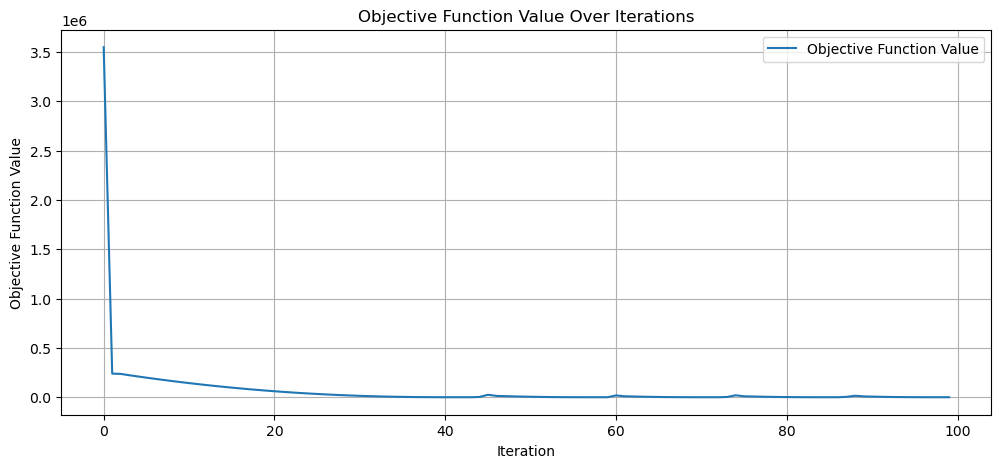

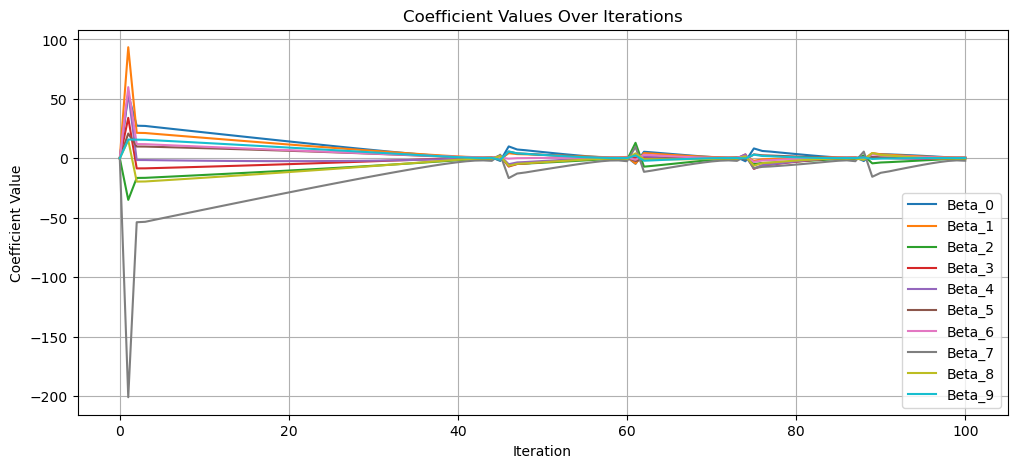

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(X, y, beta, lambda_):
    return 0.5 * np.linalg.norm(y - X @ beta) ** 2 + lambda_ * np.linalg.norm(beta, 1)

def gradient_of_f(X, y, beta):
    return X.T @ (X @ beta - y)

def G(vk, Lk, X, y, lambda_):
    grad_f_vk = gradient_of_f(X, y, vk)
    vk1 = vk - 1 / Lk * grad_f_vk
    Mk = np.linalg.norm(grad_f_vk) + lambda_ * np.linalg.norm(vk1, 1)
    return vk1, Mk

def dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter):
    vk = v0
    Lk = L0
    objective_values = []
    vk_values = [vk]

    for k in range(max_iter):
        vk1, Mk = G(vk, Lk, X, y, lambda_)
        Lk1 = max(L0, Mk / gamma_d)
        vk = vk1
        Lk = Lk1
        objective_values.append(objective_function(X, y, vk, lambda_))
        vk_values.append(vk)

    return vk, objective_values, np.array(vk_values)

# Generate synthetic data
np.random.seed(0)
n, p = 100, 10
X = np.random.randn(n, p)
y = X @ np.random.randn(p) + np.random.randn(n)

# Initialize parameters
v0 = np.zeros(p)
L0 = 1.0
gamma_d = 2.0
lambda_ = 0.1
max_iter = 100

# Run the Dual Gradient Method
beta_opt, objective_values, vk_values = dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(objective_values, label='Objective Function Value')
plt.title('Objective Function Value Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
for i in range(p):
    plt.plot(vk_values[:, i], label=f'Beta_{i}')
plt.title('Coefficient Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()


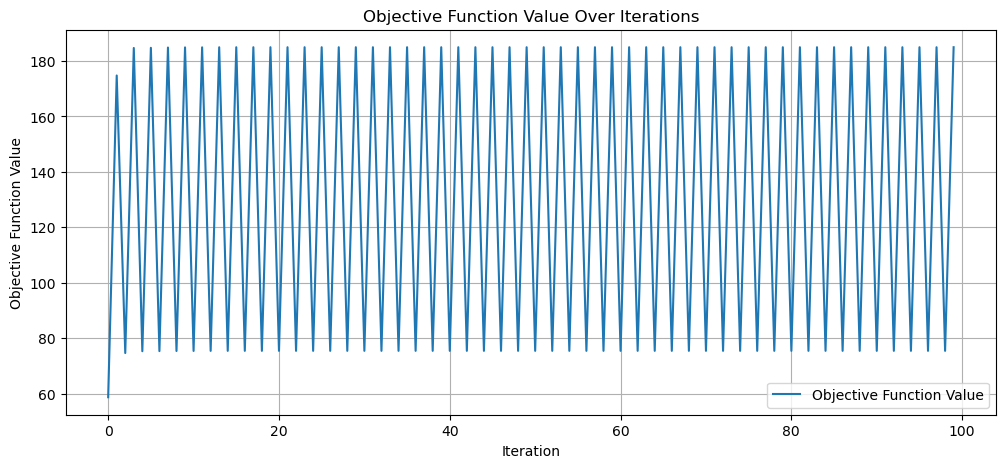

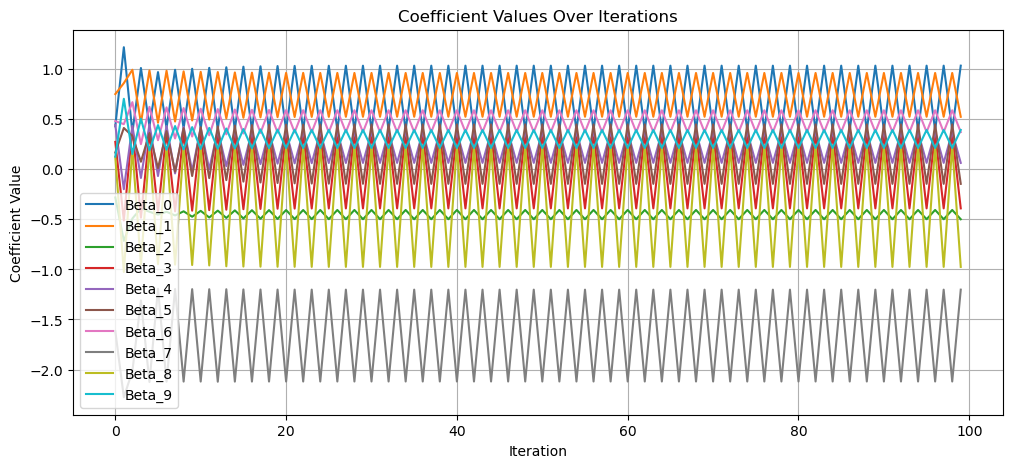

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter):
    n_samples, n_features = X.shape
    v = v0.copy()  # Initialize v at v0
    vk_values = np.zeros((max_iter, n_features))  # Track values of v
    objective_values = []
    Lk = L0

    for k in range(max_iter):
        # Compute the gradient of the objective function
        grad = X.T @ (X @ v - y) + lambda_ * np.sign(v)
        
        # Compute the step size
        Lk = max(L0, np.linalg.norm(grad) / gamma_d)
        step_size = 1 / Lk
        
        # Update the parameters
        v = v - step_size * grad
        vk_values[k] = v
        
        # Record the objective value
        objective = 0.5 * np.linalg.norm(y - X @ v)**2 + lambda_ * np.sum(np.abs(v))
        objective_values.append(objective)

    return v, objective_values, vk_values

# Generate synthetic data
np.random.seed(0)
n, p = 100, 10
X = np.random.randn(n, p)
y = X @ np.random.randn(p) + np.random.randn(n)

# Initialize parameters
v0 = np.zeros(p)
L0 = 1.0
gamma_d = 2.0
lambda_ = 1
max_iter = 100

# Run the Dual Gradient Method
beta_opt, objective_values, vk_values = dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(objective_values, label='Objective Function Value')
plt.title('Objective Function Value Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
for i in range(p):
    plt.plot(vk_values[:, i], label=f'Beta_{i}')
plt.title('Coefficient Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
import numpy as np

def gradient_of_f(X, y, beta):
    residuals = X @ beta - y
    return X.T @ residuals

def objective_function(X, y, beta, lambda_):
    prediction_error = y - X @ beta
    regularization = lambda_ * np.linalg.norm(beta, 1)
    return 0.5 * np.linalg.norm(prediction_error)**2 + regularization

def G(vk, Lk, X, y, lambda_):
    grad_f = gradient_of_f(X, y, vk)
    step_size = 1 / Lk
    vk1 = vk - step_size * grad_f
    Mk = np.linalg.norm(grad_f) + lambda_ * np.linalg.norm(vk1, 1)
    return vk1, Mk

def dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter):
    vk = v0
    Lk = L0
    objective_values = [objective_function(X, y, vk, lambda_)]
    vk_values = [vk]
    Ak = 0

    for k in range(max_iter):
        vk1, Mk = G(vk, Lk, X, y, lambda_)
        Ak += 1 / Mk
        Lk1 = max(L0, Mk / gamma_d)
        vk = vk1
        Lk = Lk1
        objective_values.append(objective_function(X, y, vk, lambda_))
        vk_values.append(vk)

        # Convergence and update sequence logic here as per Nesterov
        print(f"Iter {k}: Objective = {objective_values[-1]}, Ak = {Ak}")

    return vk, objective_values, np.array(vk_values)

# Example usage with synthetic data
np.random.seed(0)
n_samples, n_features = 1000, 10
X = np.random.randn(n_samples, n_features)
y = np.dot(X, np.random.randn(n_features)) + np.random.randn(n_samples) * 0.1
lambda_ = 10
L0 = 1.0
gamma_d = 2.0
max_iter = 50
v0 = np.zeros(n_features)

vk, objective_values, vk_values = dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter)


Iter 0: Objective = 3358624089.8523383, Ak = 1.4590730657869336e-05
Iter 1: Objective = 3174012443.4662905, Ak = 1.4975742778298906e-05
Iter 2: Objective = 3169348268.613523, Ak = 1.53716752146886e-05
Iter 3: Objective = 3164558998.958123, Ak = 1.5767902584274275e-05
Iter 4: Objective = 3159773507.213276, Ak = 1.6164433282069972e-05
Iter 5: Objective = 3154991697.1640306, Ak = 1.6561267760507464e-05
Iter 6: Objective = 3150213568.792865, Ak = 1.6958406478991304e-05
Iter 7: Objective = 3145439122.0103807, Ak = 1.735584989795906e-05
Iter 8: Objective = 3140668356.7271643, Ak = 1.7753598478888878e-05
Iter 9: Objective = 3135901272.853728, Ak = 1.81516526843026e-05
Iter 10: Objective = 3131137870.300511, Ak = 1.8550012977768925e-05
Iter 11: Objective = 3126378148.977882, Ak = 1.8948679823906535e-05
Iter 12: Objective = 3121622108.7961373, Ak = 1.9347653688387284e-05
Iter 13: Objective = 3116869749.665502, Ak = 1.974693503793936e-05
Iter 14: Objective = 3112121071.4961243, Ak = 2.0146524340

Iter 0: Objective = 3358624089.8523383, Ak = 1.4590730657869336e-05
Iter 1: Objective = 3174012443.4662905, Ak = 1.4975742778298906e-05
Iter 2: Objective = 3169348268.613523, Ak = 1.53716752146886e-05
Iter 3: Objective = 3164558998.958123, Ak = 1.5767902584274275e-05
Iter 4: Objective = 3159773507.213276, Ak = 1.6164433282069972e-05
Iter 5: Objective = 3154991697.1640306, Ak = 1.6561267760507464e-05
Iter 6: Objective = 3150213568.792865, Ak = 1.6958406478991304e-05
Iter 7: Objective = 3145439122.0103807, Ak = 1.735584989795906e-05
Iter 8: Objective = 3140668356.7271643, Ak = 1.7753598478888878e-05
Iter 9: Objective = 3135901272.853728, Ak = 1.81516526843026e-05
Iter 10: Objective = 3131137870.300511, Ak = 1.8550012977768925e-05
Iter 11: Objective = 3126378148.977882, Ak = 1.8948679823906535e-05
Iter 12: Objective = 3121622108.7961373, Ak = 1.9347653688387284e-05
Iter 13: Objective = 3116869749.665502, Ak = 1.974693503793936e-05
Iter 14: Objective = 3112121071.4961243, Ak = 2.0146524340

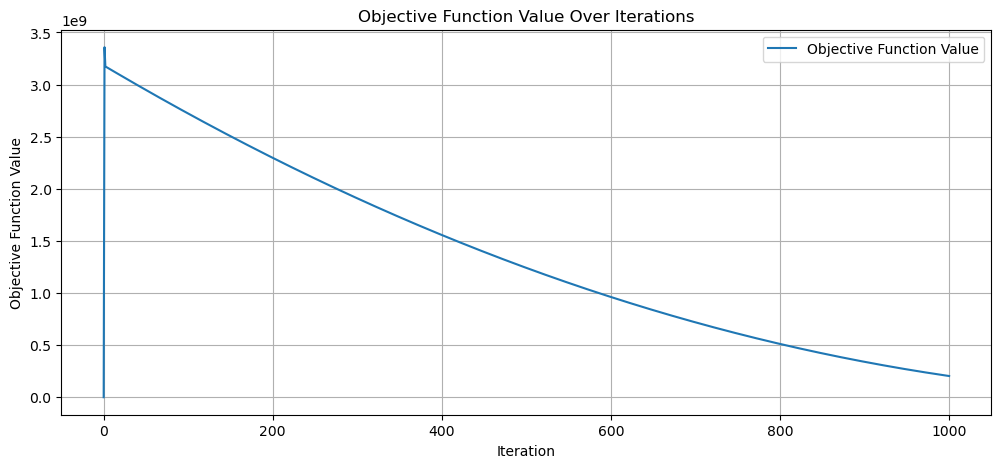

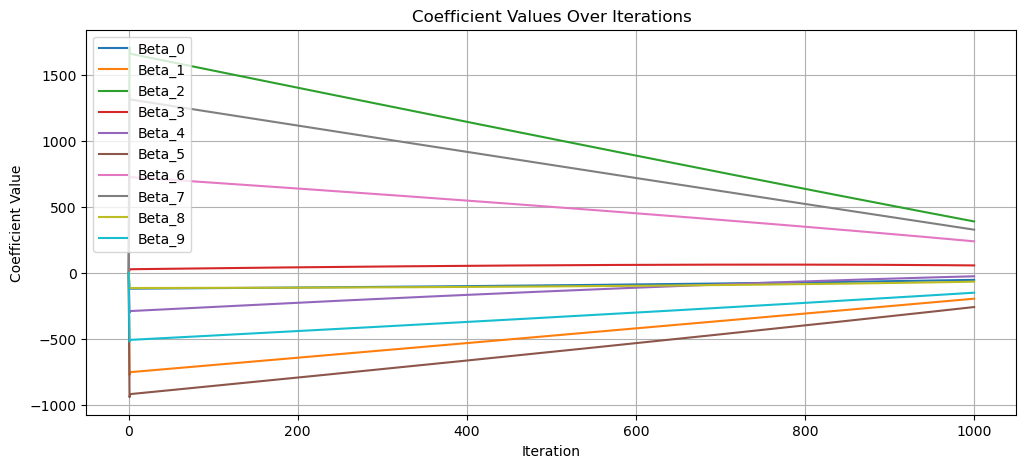

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming that the dual_gradient_method function and its necessary support functions are defined
# and that they output vk, objective_values, vk_values as previously described

# Initialize synthetic data
np.random.seed(0)
n_samples, n_features = 1000, 10
X = np.random.randn(n_samples, n_features)
y = np.dot(X, np.random.randn(n_features)) + np.random.randn(n_samples) * 0.1
lambda_ = 10
L0 = 1.0
gamma_d = 2.0
max_iter = 1000
v0 = np.zeros(n_features)

# Run the Dual Gradient Method
vk, objective_values, vk_values = dual_gradient_method(X, y, v0, L0, gamma_d, lambda_, max_iter)

# Plot the Objective Function Value Over Iterations
plt.figure(figsize=(12, 5))
plt.plot(objective_values, label='Objective Function Value')
plt.title('Objective Function Value Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

# Plot the Coefficient Values Over Iterations
plt.figure(figsize=(12, 5))
for i in range(n_features):
    plt.plot(vk_values[:, i], label=f'Beta_{i}')
plt.title('Coefficient Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()
